In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [18]:
# 1. change the column names so that each name has no spaces
#           and all lower case (replace spaces with underscores)

new_col_list=[]
for col in ufo.columns:
    new_col_list.append(col.lower().replace(" ","_"))
print(new_col_list)
ufo.columns=new_col_list
print(ufo.head())

['city', 'colors_reported', 'shape_reported', 'state', 'time']
                   city colors_reported shape_reported state             time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00


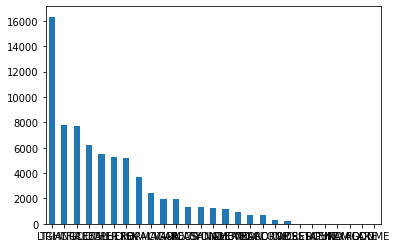

In [23]:
# 2. Show a bar chart of all shapes reported

#ufo.groupby('shape_reported').count()
val=ufo['shape_reported'].value_counts()

ax = val.plot.bar(x='shape_reported', y='val', rot=0)

In [24]:
# 3. Show a dataframe that only displays the reportings from Utah
df_utah=ufo[ufo['city']=="Utah"]    
print(df_utah.head())

       city colors_reported shape_reported state              time
18781  Utah             NaN           OVAL    UT    3/15/2001 3:00
19756  Utah             NaN            NaN    UT   7/18/2001 22:35
22945  Utah             NaN           DISK    UT   8/17/2002 23:12
29489  Utah             NaN       FIREBALL    UT    7/10/2004 1:00
34852  Utah             NaN       FIREBALL    UT  11/15/2005 15:00


In [25]:
# 4. Show a dataframe that only displays the reportings from Texas

df_texas=ufo[ufo['state']=="TX"]
print(df_texas.head())

       city colors_reported shape_reported state             time
37   Dallas             NaN         SPHERE    TX  7/15/1945 14:00
43    Alice             NaN           DISK    TX  3/15/1946 15:30
49   Conroe             NaN          OTHER    TX  1/10/1947 20:00
92   Borger             NaN           DISK    TX  6/15/1948 16:00
114    Post             NaN           DISK    TX  9/15/1949 21:00


In [27]:
# 5. Show a dataframe that only displays the reportings from Utah OR Texas

df_union= pd.concat([df_utah, df_texas]).drop_duplicates()
print(df_union.head())

       city colors_reported shape_reported state              time
18781  Utah             NaN           OVAL    UT    3/15/2001 3:00
19756  Utah             NaN            NaN    UT   7/18/2001 22:35
22945  Utah             NaN           DISK    UT   8/17/2002 23:12
29489  Utah             NaN       FIREBALL    UT    7/10/2004 1:00
34852  Utah             NaN       FIREBALL    UT  11/15/2005 15:00


In [30]:
# 6. Which shape is reported most often?
print(ufo['shape_reported'].value_counts().head(1))


LIGHT    16332
Name: shape_reported, dtype: int64


In [72]:
'''
Part 2: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')
goals.sort_index(by='team1score', inplace = True)
print(goals.head(25))

      game_id minute          player  team1score  team2score
1103      422     80        VlaoviÄ           0           2
1414      551     34         J. Cole           0           1
1423      554     60         FlÃ¡vio           0           1
1425      556     10         Å½igiÄ           0           1
1426      556     20           IliÄ           0           2
1430      557     26       Materazzi           0           1
1431      557     87         Inzaghi           0           2
1444      561     36         Juanito           0           1
1446      563     55          Vieira           0           1
1447      563     61           Henry           0           2
1452      566      6        MÃ¡rquez           0           1
1465      573     49           Ayala           0           1
1470      576     57           Henry           0           1
1471      577    119          Grosso           0           1
1410      549     57        Podolski           0           3
1472      577   120+    

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [73]:
# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
#     Hint: To replace, use a .apply lambda function to remove any plus symbols
#     Hint: look up pandas dataframes astype method
#     To check use the dataframe.describe() method to see if it is an integer
goals['minute']=goals['minute'].apply(lambda x: x.replace("+",""))
print(goals.head(25))
print("Before apply the type is", goals['minute'].describe())
goals['minute']=goals['minute'].apply(pd.to_numeric,downcast='integer')
print("After apply the type is", goals['minute'].describe())

      game_id minute          player  team1score  team2score
1103      422     80        VlaoviÄ           0           2
1414      551     34         J. Cole           0           1
1423      554     60         FlÃ¡vio           0           1
1425      556     10         Å½igiÄ           0           1
1426      556     20           IliÄ           0           2
1430      557     26       Materazzi           0           1
1431      557     87         Inzaghi           0           2
1444      561     36         Juanito           0           1
1446      563     55          Vieira           0           1
1447      563     61           Henry           0           2
1452      566      6        MÃ¡rquez           0           1
1465      573     49           Ayala           0           1
1470      576     57           Henry           0           1
1471      577    119          Grosso           0           1
1410      549     57        Podolski           0           3
1472      577    120    

In [82]:
# 2. Show goals scored in the first 5 minutes of a game

goals[goals['minute']<5]


,game_id,minute,player,team1score,team2score
1505,591,3,PetrÃ¡Å¡,0,1
404,130,1,Park Seung-jin,0,1
488,217,4,VujadinoviÄ,0,1
536,238,2,ButragueÃ±o,0,1
1350,524,4,Pauleta,0,1
1408,549,4,Klose,0,1
1390,541,2,Gyan,0,1
1400,547,4,Rusol,0,1
1703,671,3,MÃ¼ller,0,1
1060,405,4,KomljenoviÄ,0,1


In [83]:
# 3. Show goals scored after the regulation 90 minutes is over

goals[goals['minute']>90]



,game_id,minute,player,team1score,team2score
1471,577,119,Grosso,0,1
1472,577,120,Del Piero,0,2
2057,806,94,Ä°lhan [Golden Goal],0,1
1198,463,106,Milla,1,0
1215,470,119,Platt,1,0
1214,469,92,StojkoviÄ,1,2
920,353,102,R. Baggio [p.],1,2
2042,797,104,H. Camara [Golden Goal],1,2
1077,413,113,Blanc [Golden Goal],1,0
1564,610,94,MÃ¼ller,1,2


In [84]:
# 4. Show the top scoring players
goals['player'].value_counts()


MÃ¼ller             20
Ronaldo             14
Klose               14
Fontaine            13
PelÃ©               12
Klinsmann           11
Kocsis              11
Lato                10
Rahn                10
Vieri                9
VavÃ¡                9
Seeler               9
Ademir               9
Rossi                9
Jairzinho            9
Rummenigge           9
Lineker              8
LeÃ´nidas            8
StÃ¡bile             8
Maradona             8
Cubillas             8
MÃ­guez              8
VÃ¶ller              8
Rivaldo              7
Tichy                7
SchÃ¤fer             7
Rep                  7
Szarmach             7
Kempes               6
HernÃ¡ndez           6
                    ..
MonzÃ³n              1
Linke                1
Al-Jaber             1
Iaquinta [p.]        1
Ferdinand            1
Scholes              1
Mild                 1
Cabrera              1
Mannion              1
Amarilla [p.]        1
M. Evaristo          1
Barnetta             1
Serena     

In [14]:
# 5. Show a histogram (distribution) of minutes with 20 bins



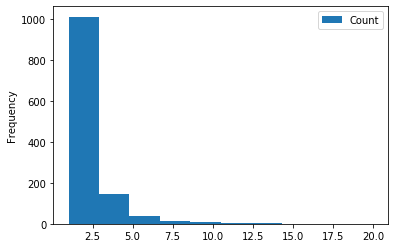

In [105]:
# 6. Show a histogram of the number of goals scored by players
vc=goals['player'].value_counts()
player_goal_df = vc.rename_axis('Player').reset_index(name='Count')
#dft=pd.DataFrame(goals['player'],goals['player'].value_counts())
#dft.describe()
player_goal_df.head()
#ax=player_goal_df.hist()
#patient_dets.set_index('PatientAge')['PatientAgecounts'].plot.bar()

ax=player_goal_df.plot.hist(by='player')
#ax.set_xlabel("Players")
#ax.set_ylabel("Number of goals")
#dft.columns=["Player","Goals"]
#dft.head()